# Photon Correlation Paper

This is the official IJulia Notebook for the Photon Correlation paper.

Here we will derive all the results based on the [ThreePhoton.jl](https://github.com/h4rm/ThreePhotons.jl) package.

For the execution of this Notebook, you need to install [ThreePhoton.jl](https://github.com/h4rm/ThreePhotons.jl).

In [1]:
#Preparation of environment
using ThreePhotons
include("paper.jl")

plot_resolution_vs_ppi_various_total_photons (generic function with 2 methods)

In [5]:
#For Development:
using ClobberingReload
#creload(ThreePhotons)

In [2]:
data_dir = "/Users/ben/Documents/biophysics/projects/reconstruction/data"

"/Users/ben/Documents/biophysics/projects/reconstruction/data"

In [3]:
#Prepare all the necesary global variables for potential comparison
density_K38,fourier_K38,intensity_K38 = createSphericalHarmonicsStructure("$(data_dir)/structures/crambin.pdb", 25, 38, float(38))
densityCube_K38,fourierCube_K38,intensityCube_K38 = createCubicStructure("$(data_dir)/structures/crambin.pdb", 2*38+1, float(38))
println("Done Loading")

Initializing SH structure from /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb with LMAX=25, KMAX=38, rmax=38.0.
Initializing cubic structure from /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb with cubesize=77, rmax=38.0.
Done Loading


In [3]:
#Maximum achievable resolution for K=26
2*pi/(26 * dr(intensity_K38))

2.9230769230769234

In [4]:
#Maximum wave number k
26*dr(intensity_K38)

2.14951076298249

In [7]:
c2ref_full, c2ref , c3ref_full, c3ref = loadHistograms(26, "$(data_dir)/output_owl/data_generation/SH_10p_N32_K38_R38.0_P3276800000/histo.dat")
println("done")

Loaded 3.4212799220997107e11 doublets and 1.1979746196510442e12 triplets from /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/data_generation/SH_10p_N32_K38_R38.0_P3276800000/histo.dat generated from 3276800000 pictures.
done


In [11]:
#Save 6 randomly chosen two-photon conform intensities
random_intensity = retrieveSolution(c2ref_full/sumabs(c2ref_full), 18, 25, 38, qmax(38, float(38)))
for i = 1:6
    saveCube(deleteTerms(randomStartStructure(random_intensity, 26, 18), 26, 18), "output/random_intensity_$(i).mrc")
end

Saving cube to output/random_intensity_1.mrc with cubesize=77
Saving cube to output/random_intensity_2.mrc with cubesize=77
Saving cube to output/random_intensity_3.mrc with cubesize=77
Saving cube to output/random_intensity_4.mrc with cubesize=77
Saving cube to output/random_intensity_5.mrc with cubesize=77
Saving cube to output/random_intensity_6.mrc with cubesize=77


# Single Molecule Shot

In [11]:
#Number of photons per image for noise with different Gaussian widths
#Needs to be tuned such that gamma = 1.0 equals 10 photons per image
intensity_K38_surf = getSurfaceVolume(intensity_K38)
noise_photons = [14, 14, 14, 25]
for (j,sigma) in enumerate([0.5, 0.75, 1.125, 2.5])
    noise_K38_surf = get_noise_volume(intensity_K38_surf, sigma)
    println(sigma," ", mean([length(pointsPerOrientation(noise_K38_surf, noise_K38_surf.rmax, sigma, noise_photons[j];)[1]) for i = 1:10000]))
end

0.5 10.9291
0.75 10.8541
1.125 10.5692
2.5 10.4842


In [6]:
#Correct scaling of incoming photonsto achieve desired photons per image
for ppi in Int64[550, 2.5*550, 5.0*550, 10.0*550]
    println(ppi, " ", mean([length(pointsPerOrientation(intensity_K38_surf, intensity_K38_surf.rmax, intensity_K38_surf.rmax/3.0, ppi)[1]) for i = 1:1000]))
end

550 10.136
1375 25.945
2750 50.656
5500 101.244


In [13]:
_,_,intensityCube_K38_highres = createCubicStructure("$(data_dir)/structures/crambin.pdb", 4*38+1, float(2*38))
println("high res scattering image")

Initializing cubic structure from ../../../data/structures/crambin.pdb with cubesize=153, rmax=76.0.
high res scattering image


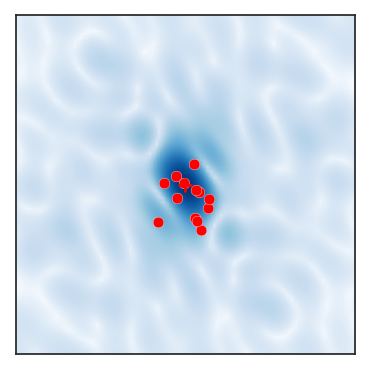

In [14]:
#Examplary single molecule scattering shot
plot_scattering_image(intensityCube_K38_highres; number_incident_photons=200, qcut_ratio=0.5, point_size=60.0, colorfill="red", coloredge="white")
savefig("paper/pattern.pdf", bbox_inches="tight", dpi=300)
savefig("paper/pattern.png", bbox_inches="tight", dpi=300)

# Synthetic Data Generation

The synthatic datageneration has been done externally.
See [Histogram Generation](https://github.com/h4rm/ThreePhotons.jl/blob/master/jobs/run_generate_histograms.jl) for more info.

# Processing results

The results were calculated from the synthetic scattering images. See [Structure Determination](https://github.com/h4rm/ThreePhotons.jl/blob/master/jobs/run_parallel_determination.jl) for more information.

## Average Results

The structure results were averaged in real space. Here, we also average the intensity in Fourier space for comparison with the reference intensity.

In [29]:
for pic in ["P1280000", "P5120000", "P20480000", "P81920000", "L20_inf", "P327680000", "P3276800000"]
    println("Processing $pic")
    average_intensities("$(data_dir)/output_owl/paper_res_vs_pictures_10p_KMAX38_N32_K26_L18_0.99998/$pic/", "output/KMAX38_K26_L18_$pic", densityCube_K38, fourierCube_K38, intensityCube_K38; do_phasing=false)
end

Processing P1280000
Averaged density has resoution of: 13.956310457908964
Saving cube to output/KMAX38_K26_L18_P1280000/intensity.mrc with cubesize=77
Saving cube to output/KMAX38_K26_L18_P1280000/averaged_density.mrc with cubesize=77
Processing P5120000
Averaged density has resoution of: 13.780878207037643
Saving cube to output/KMAX38_K26_L18_P5120000/intensity.mrc with cubesize=77
Saving cube to output/KMAX38_K26_L18_P5120000/averaged_density.mrc with cubesize=77
Processing P20480000
Averaged density has resoution of: 7.820341439253413
Saving cube to output/KMAX38_K26_L18_P20480000/intensity.mrc with cubesize=77
Saving cube to output/KMAX38_K26_L18_P20480000/averaged_density.mrc with cubesize=77
Processing P81920000
Averaged density has resoution of: 4.76778270582724
Saving cube to output/KMAX38_K26_L18_P81920000/intensity.mrc with cubesize=77
Saving cube to output/KMAX38_K26_L18_P81920000/averaged_density.mrc with cubesize=77
Processing L20_inf
Averaged density has resoution of: 3.2

In [64]:
for pic in ["P4198720"]
    average_intensities("$(data_dir)/output_owl/paper_res_vs_pictures_100p_KMAX38_N32_K26_L18_0.99998/$pic/", "output/KMAX38_100p_K26_L18_$pic", densityCube_K38, fourierCube_K38, intensityCube_K38; do_phasing=false)
end

Averaged density has resoution of: 3.3024288134443087
Saving cube to output/KMAX38_100p_K26_L18_P4198720/intensity.mrc with cubesize=77
Saving cube to output/KMAX38_100p_K26_L18_P4198720/averaged_density.mrc with cubesize=77


In [213]:
#Noise averages
for sigma in [0.5, 0.75, 1.125, 2.5]
    for gamma in collect(0.1:0.1:0.5)
        dic1 = "G$(gamma)_S$(sigma)"
        dic2 = "S$(sigma)_G$(gamma)"
        average_intensities("$(data_dir)/output_owl/paper_noise_10p_KMAX38_N32_K26_L18_0.99998/$dic1/", "output/noise/$dic2", densityCube_K38, fourierCube_K38, intensityCube_K38; do_phasing=false)
    end
end

Averaged density has resoution of: 3.650724907747352
Saving cube to output/noise/S0.5_G0.1/intensity.mrc with cubesize=77
Saving cube to output/noise/S0.5_G0.1/averaged_density.mrc with cubesize=77
Averaged density has resoution of: 4.721063719999375
Saving cube to output/noise/S0.5_G0.2/intensity.mrc with cubesize=77
Saving cube to output/noise/S0.5_G0.2/averaged_density.mrc with cubesize=77
Averaged density has resoution of: 5.03904151854953
Saving cube to output/noise/S0.5_G0.3/intensity.mrc with cubesize=77
Saving cube to output/noise/S0.5_G0.3/averaged_density.mrc with cubesize=77
Averaged density has resoution of: 5.19660659522221
Saving cube to output/noise/S0.5_G0.4/intensity.mrc with cubesize=77
Saving cube to output/noise/S0.5_G0.4/averaged_density.mrc with cubesize=77
Averaged density has resoution of: 8.400935258070588
Saving cube to output/noise/S0.5_G0.5/intensity.mrc with cubesize=77
Saving cube to output/noise/S0.5_G0.5/averaged_density.mrc with cubesize=77
Averaged den

In [352]:
best_dir = "output/KMAX38_K26_L18_P3276800000"
# best_dir = "output/KMAX38_100p_K26_L18_P4198720"
best_result_state = deserializeFromFile("$(best_dir)/state.dat")
best_intensity = best_result_state["fittedIntensity"]
best_density_cube = loadCube("$(best_dir)/averaged_density.mrc")
# best_intensity = absoluteSquare(forward(best_density_cube))
best_K = 26
best_L = 18
println(calculate_maximum_resolution(FSC(best_density_cube, fourierCube_K38), dr(intensityCube_K38)))
println("done")

3.3006871373919076
done


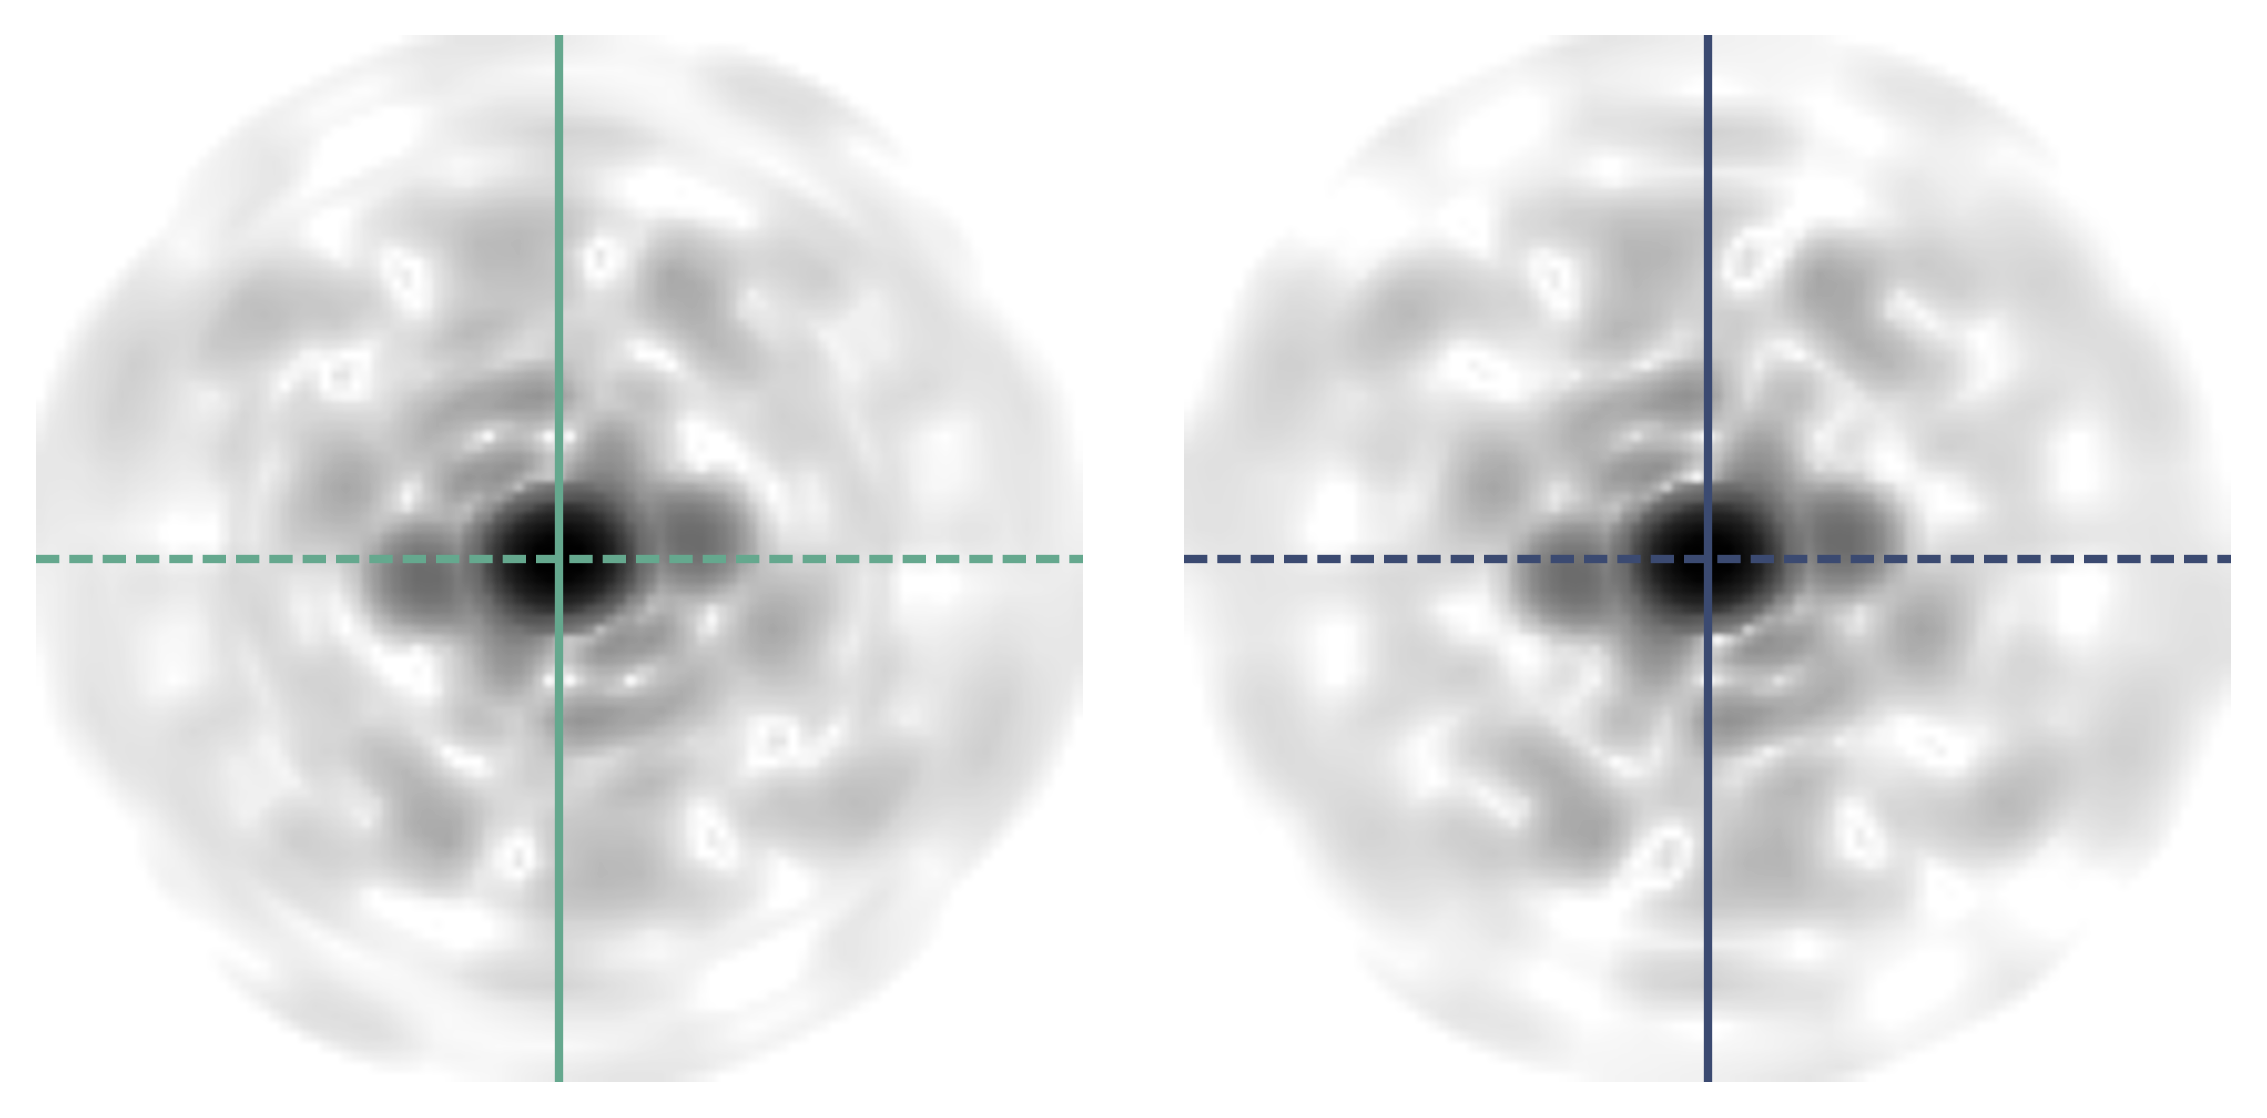

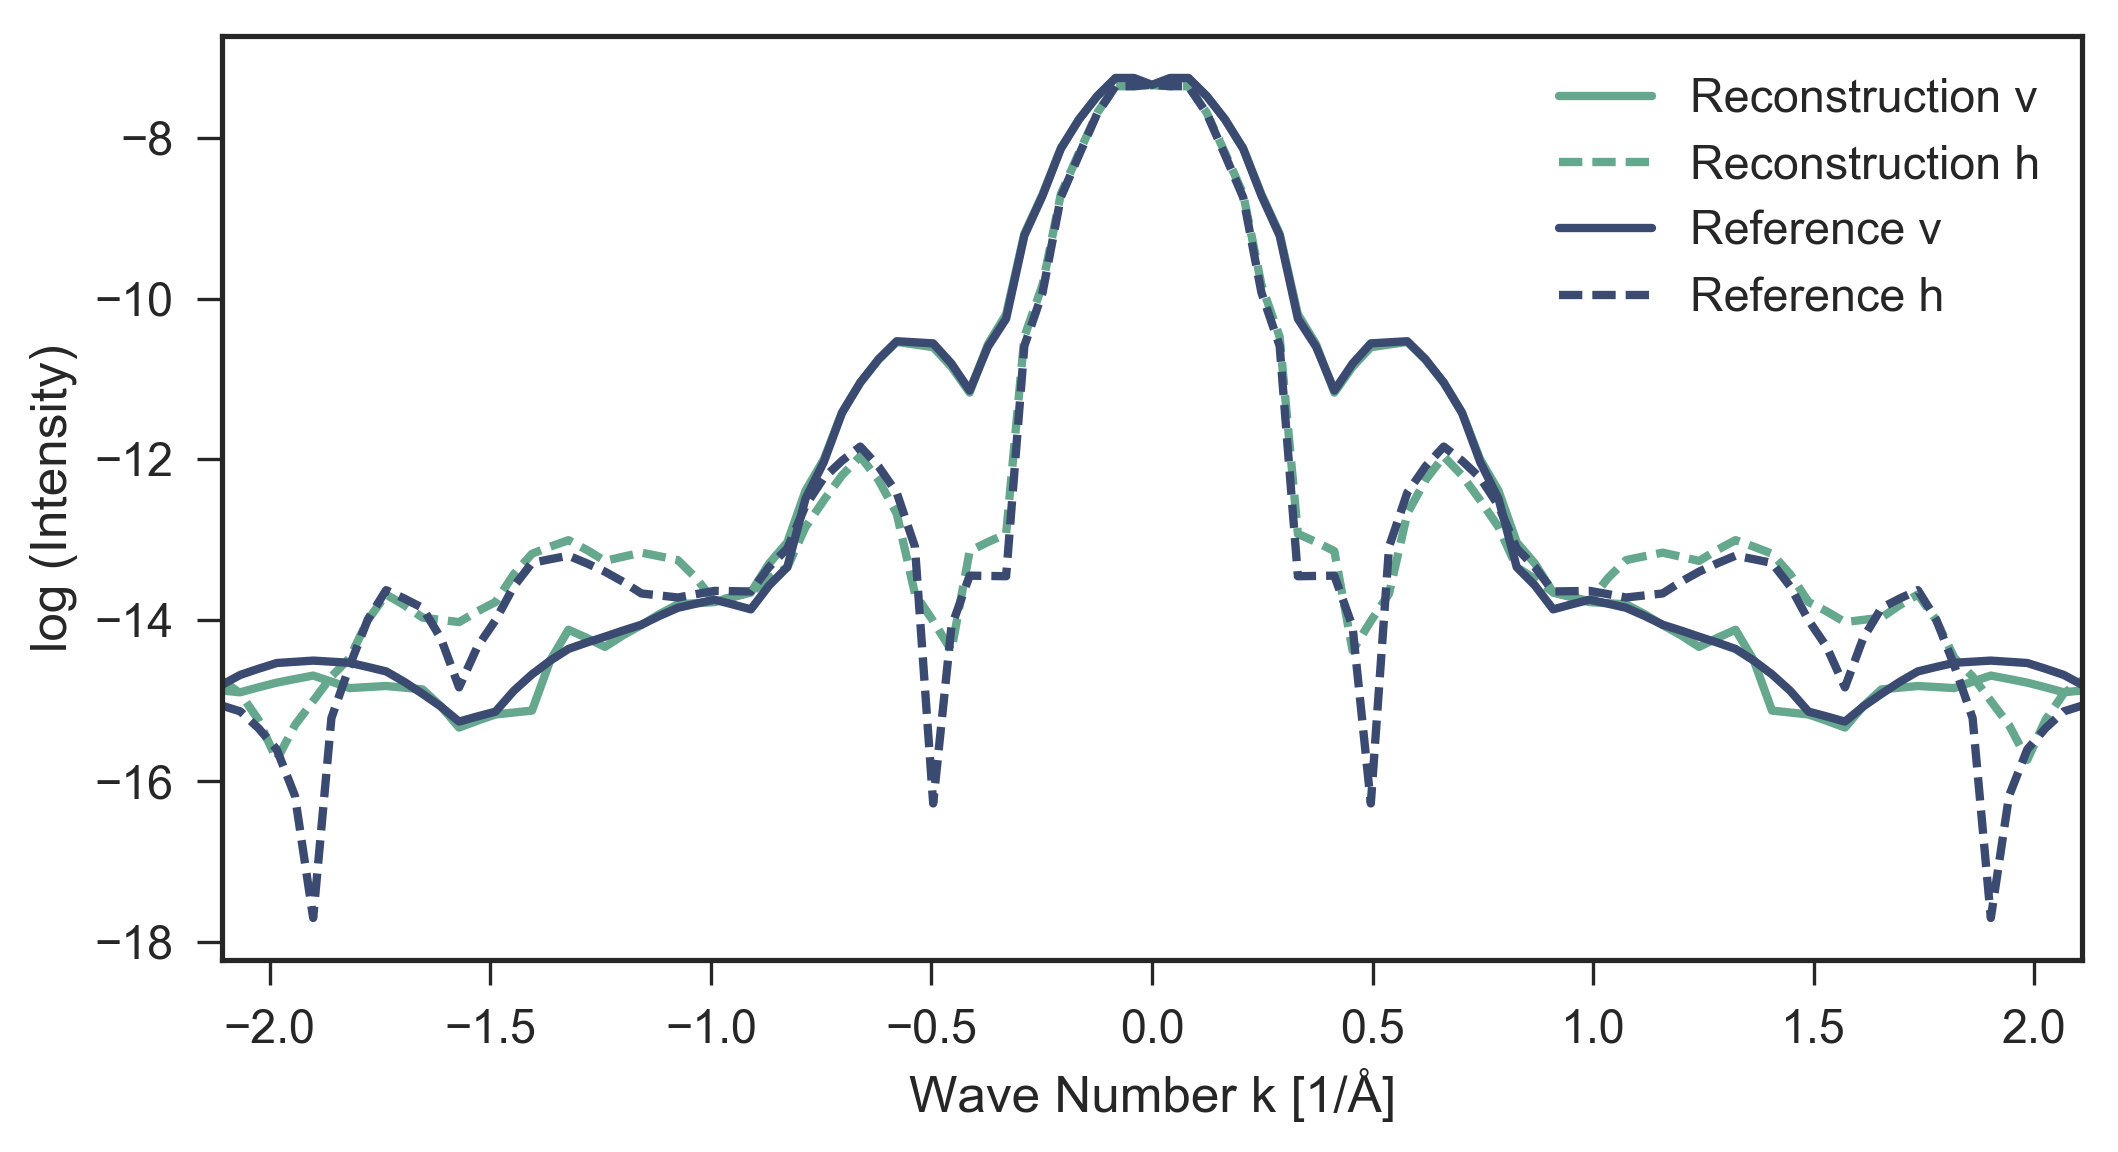

In [353]:
cube_reference = getCube(deleteTerms(intensity_K38, best_K, best_L), 4*intensity_K38.kmax+1)
# _,_,intensityCube_double = createCubicStructure("../structures/crambin.pdb", 4*38+1, float(2*38))
# cubeA = intensityCube_double
cube_retrieved = getCube(deleteTerms(best_intensity, best_K, best_L), 4*intensity_K38.kmax+1)
plot_compare_intensity_cubes_plane(cube_retrieved, cube_reference)
plot_compare_intensity_cubes_linear(cube_retrieved, cube_reference)#,noise_cube)

In [13]:
saveCube(getCube(best_intensity, 4*intensity_K38.kmax+1), "output/intensity_highres.mrc")

Saving cube to output/intensity_highres.mrc with cubesize=153


In [13]:
best_K*dr(intensity_K38)

2.14951076298249

# Electron density with correct phases

gives the correct density. Much of the information is inside the phases though.

In [71]:
fourierSurf = getSurfaceVolume(fourier)
amplitudes = getSurfaceVolume(best_intensity)
amplitudes.surf = map(sqrt, amplitudes.surf)
amplitudes.surf = [amplitudes.surf[k] .* exp(1im*angle(fourierSurf.surf[k])) for k = 1:length(amplitudes.surf)]
retrievedFourier = getSphericalHarmonicsVolume(amplitudes)
retrievedElectronDensity = getInverseFourierTransform(retrievedFourier)
saveCube(retrievedElectronDensity, "output/retrieved_density_real_phases.mrc")

Saving cube to output/retrieved_density_real_phases.mrc with cubesize=61


In [81]:
#test phases
ball = deepcopy(density)
for k = 1:ball.kmax
    ball.coeff[k] = zeros(Complex{Float64}, Base.size(ball.coeff[k]))
    if k < Integer(ball.kmax/2) setc(ball, k, 0, 0, 1.0) end
end
ball_phases = getFourierTransform(ball)
# saveCube(ball, "output/ball.mrc")

Saving cube to output/ball.mrc with cubesize=61


# Electron Density with respective cutoff

In [63]:
cutoff_fourier = deepcopy(fourier_K38)
cutoff_fourier = deleteTerms(cutoff_fourier, best_K, best_L)
cutoff_density = getInverseFourierTransform(cutoff_fourier)
saveCube(cutoff_density, "paper/density_K$(best_K)_L$(best_L)_nophasing.mrc")


Saving cube to paper/density_K26_L18_nophasing.mrc with cubesize=77


In [13]:
#Best possible resolution
2*pi/(best_K*dr(intensity))

2.9166666666666665

# Resolution Calculations

In [354]:
#Load optimal parameters list precalculated
#See https://github.com/h4rm/ThreePhotons.jl/blob/master/jobs/run_optimal.jl
parameter_list = load_parameter_list(intensity_K38)
println("done")

K2=35, K3=20, L3=12, res=4.7147318098088205, retrieved=5.109530070138559
K2=35, K3=20, L3=14, res=4.098624705272506, retrieved=4.718734992683216
K2=35, K3=20, L3=16, res=3.778441950376865, retrieved=4.32294766355958
K2=35, K3=22, L3=12, res=5.044462461529949, retrieved=5.640131059224442
K2=35, K3=22, L3=14, res=4.2058260515352375, retrieved=4.871641107712256
K2=35, K3=22, L3=16, res=3.466662910726098, retrieved=4.032682826681915
K2=35, K3=24, L3=12, res=5.305468671069324, retrieved=5.433497685131747
K2=35, K3=24, L3=14, res=4.145454737322187, retrieved=4.500656270543582
K2=35, K3=24, L3=16, res=3.19495280627383, retrieved=4.337584427522047
K2=35, K3=26, L3=12, res=5.636675009768613, retrieved=5.7632555349011545
K2=35, K3=26, L3=14, res=4.575136360907536, retrieved=4.673962714435073
K2=35, K3=26, L3=16, res=3.2360942704597786, retrieved=3.556468415991999
K2=35, K3=28, L3=12, res=5.904637060207069, retrieved=5.576503936040018
K2=35, K3=28, L3=14, res=4.440193507791168, retrieved=4.519237

In [355]:
#Setting the expansion parameters
KMAX=38
N=32
K=26
L=18

18

In [356]:
#Loading metadata
correlation_list,correlation_name_list,triplet_counts,_ = prepare_set([1280000, 5120000, 20480000, 81920000, 327680000, 3276800000], 10, KMAX, K, N, true)

Loaded 2.138293741999808e9 doublets and 7.488247893999958e9 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P20480000/histo.dat generated from 20480000 pictures.
Loaded 5.343778560000029e8 doublets and 1.870729304e9 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P5120000/histo.dat generated from 5120000 pictures.
Loaded 3.4213717671996933e10 doublets and 1.1980445971399933e11 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P327680000/histo.dat generated from 327680000 pictures.
Loaded 1.6758971070699392e15 doublets and 8.977560459860162e21 triplets from ../expdata/correlations_N32_K38_L20_inf.dat generated from inf pictures.
Loaded 3.4212799220997107e11 doublets and 1.1979746196510442e12 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P3276800000/histo.dat generated from 3276800000 pictures.
Loaded 1.3368947400000073e8 doublets and 4.68111154e8 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P1280000/histo.dat 

(Dict("P20480000"=>Dict{String,Any}(Pair{String,Any}("label",L"$2.0\cdot10^{8}\,\mathrm{photons}$"),Pair{String,Any}("label_triplets",L"$7.1\cdot10^{9}\,\mathrm{triplets}$"),Pair{String,Any}("linestyle","-"),Pair{String,Any}("color",Any[0.457614,0.705795,0.563479]),Pair{String,Any}("shortlabel",L"$2.0\cdot10^{8}$"),Pair{String,Any}("shortlabel_triplets",L"$7.1\cdot10^{9}$"),Pair{String,Any}("path","../parallel/data_generation/SH_10p_N32_K38_R38.0_P20480000/histo.dat")),"P5120000"=>Dict{String,Any}(Pair{String,Any}("label",L"$5.1\cdot10^{7}\,\mathrm{photons}$"),Pair{String,Any}("label_triplets",L"$1.8\cdot10^{9}\,\mathrm{triplets}$"),Pair{String,Any}("linestyle","-"),Pair{String,Any}("color",Any[0.64866,0.79777,0.618645]),Pair{String,Any}("shortlabel",L"$5.1\cdot10^{7}$"),Pair{String,Any}("shortlabel_triplets",L"$1.8\cdot10^{9}$"),Pair{String,Any}("path","../parallel/data_generation/SH_10p_N32_K38_R38.0_P5120000/histo.dat")),"P327680000"=>Dict{String,Any}(Pair{String,Any}("label",L"$3.3

In [357]:
#Filter out results with close to 3.5 Angstrom resolution and minimal paramter numbers
filtered_parameters = sort(filter((x)-> x["res_retrieved"] < 3.5,parameter_list), lt=(a,b)->a["num_parameters"]<b["num_parameters"])[1]

Dict{String,Any} with 10 entries:
  "intensity"      => CubeVolume(Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.0…
  "num_parameters" => 3.43901e8
  "res_optimal"    => 3.14268
  "K2"             => 38
  "density"        => CubeVolume(Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.0…
  "L3"             => 18
  "res_retrieved"  => 3.24878
  "res_max"        => 2.92308
  "optimal"        => (CubeVolume(Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.…
  "K3"             => 26

In [13]:
calculate_maximum_resolution(get_optimal(parameter_list,K, L)["optimal"][3], dr(intensity_K38))

3.1426781511182607

In [14]:
get_optimal(parameter_list,28, L)["res_optimal"]

2.9732563963752336

In [15]:
K*dr(intensity_K38)

2.14951076298249

## Loading and plotting resolution results for different photon counts

In [358]:
sc_vs_triplets = Dict()
load_sc_vs_triplets(sc_vs_triplets, densityCube_K38, fourierCube_K38, intensityCube_K38, K, L, "$(data_dir)/output_owl/paper_res_vs_pictures_10p_KMAX$(KMAX)_N32_K$(K)_L$(L)_0.99998", parameter_list, correlation_list)

Dict{String,Any} with 12 entries:
  "label"             => L"$\mathrm{optimal}$"
  "isc_err"           => [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN  …  NaN,NaN,N…
  "isc_nofitting"     => [0.992814,0.99846,0.998121,0.997303,0.992446,0.992594,…
  "res"               => 3.14268
  "fsc"               => [0.999975,0.999894,0.99964,0.998552,0.996631,0.995716,…
  "isc_nofitting_err" => [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN  …  NaN,NaN,N…
  "res_err"           => NaN
  "isc"               => [0.999488,0.999683,0.999715,0.998928,0.989991,0.987849…
  "shortlabel"        => L"$\mathrm{optimal}$"
  "linestyle"         => "--"
  "fsc_err"           => [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN  …  NaN,NaN,N…
  "color"             => "grey"

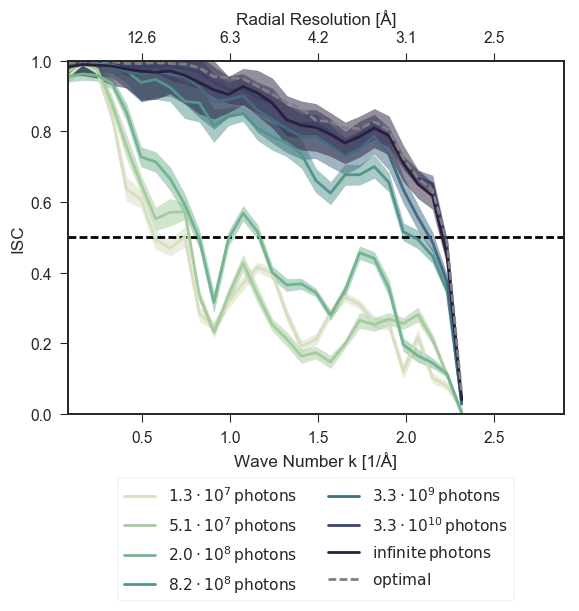

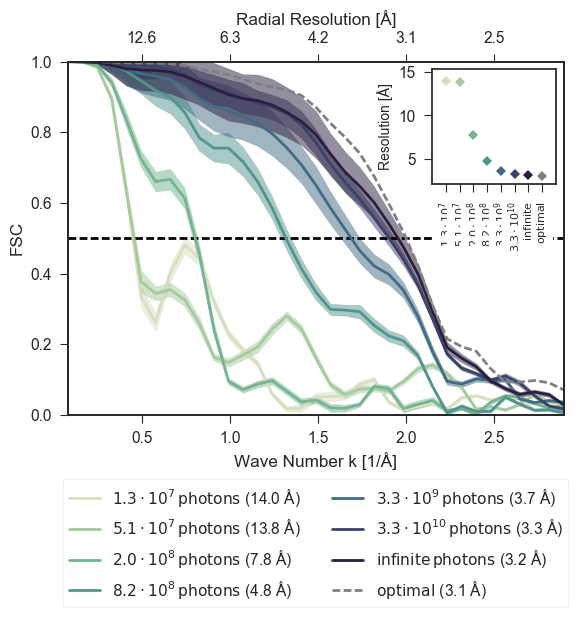

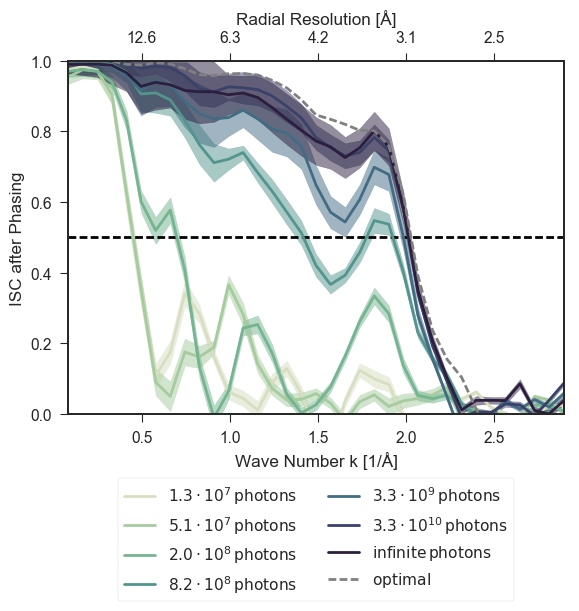

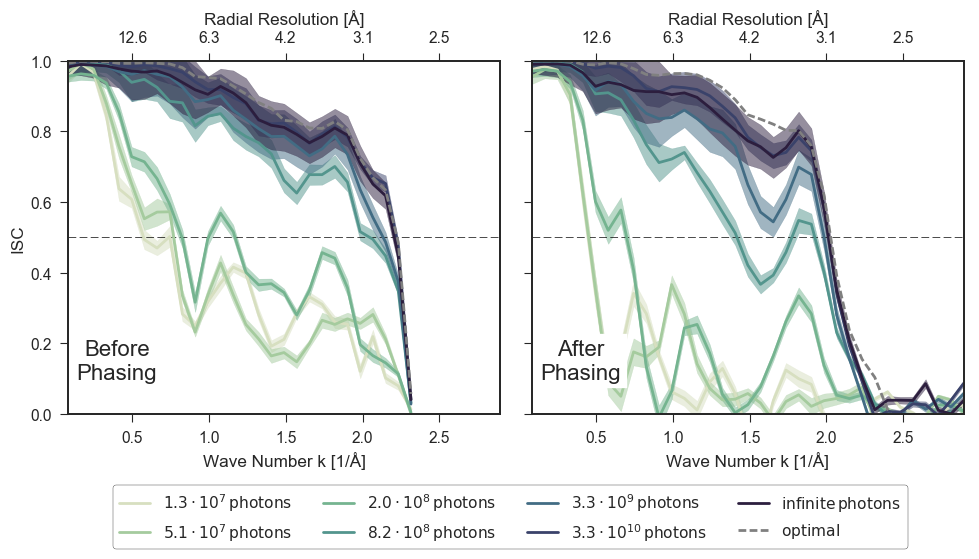

In [360]:
plot_sc_list(sc_vs_triplets[K][L],"paper/sc_vs_triplets_K$(K)_L$(L)_N$(N)", vcat(correlation_name_list, ["optimal"]), dr(intensity_K38), 35)

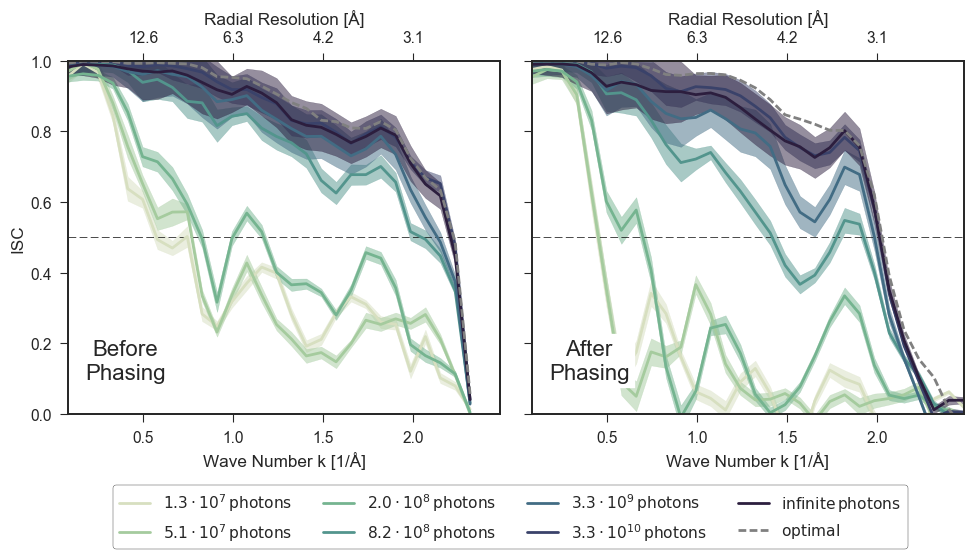

Done


In [361]:
plot_isc_comparision(sc_vs_triplets[K][L],"paper/sc_vs_triplets_K$(K)_L$(L)_N$(N)_K30", vcat(correlation_name_list, ["optimal"]), dr(intensity_K38), 30)
println("Done")

In [362]:
Dict( dir=>(sc_vs_triplets[K][L][dir]["res"], sc_vs_triplets[K][L][dir]["res_err"]) for dir in vcat(correlation_name_list, "optimal"))

Dict{String,Tuple{Float64,Float64}} with 8 entries:
  "P20480000"   => (7.82034,0.413414)
  "P5120000"    => (13.7809,0.25372)
  "P327680000"  => (3.72161,1.00757)
  "L20_inf"     => (3.21669,1.12214)
  "P3276800000" => (3.30069,0.621102)
  "optimal"     => (3.14268,NaN)
  "P1280000"    => (13.9563,0.23267)
  "P81920000"   => (4.76778,0.636823)

## Overfitting: Resolution vs. L

In [17]:
kcut_vs_L_range = 2:2:18
kcut_vs_L_pictures = ["P5120000", "P20480000", "P81920000", "P3276800000"]


4-element Array{String,1}:
 "P5120000"   
 "P20480000"  
 "P81920000"  
 "P3276800000"

In [18]:
kcut_vs_L = [ pictures=> [ L=> load_runs("$(data_dir)/output_owl/paper_res_vs_L_10p_KMAX$(KMAX)_N$(N)_K$(K)_0.99998/$(pictures)_L$L", densityCube_K38, fourierCube_K38, intensityCube_K38) for L=kcut_vs_L_range] for pictures in kcut_vs_L_pictures]


Use "Dict(a=>b for (a,b) in c)" instead.

Use "Dict(a=>b for (a,b) in c)" instead.


Dict{String,Dict{Int64,Dict{String,Any}}} with 4 entries:
  "P20480000"   => Dict(18=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.0119…
  "P5120000"    => Dict(18=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.0245…
  "P3276800000" => Dict(18=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.0149…
  "P81920000"   => Dict(18=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.0248…

In [19]:
for pictures in kcut_vs_L_pictures
    println("$pictures:")
    for L in kcut_vs_L_range
        println("L=$L, resolution=", calculate_maximum_resolution(kcut_vs_L[pictures][L]["fsc"], dr(intensityCube_K38)))
    end
end

P5120000:
L=2, resolution=14.111826109419056
L=4, resolution=12.96401013401373
L=6, resolution=13.185486908209722
L=8, resolution=12.846049619365665
L=10, resolution=10.9715230850418
L=12, resolution=11.088463933316277
L=14, resolution=8.356134540150107
L=16, resolution=13.122401876882018
L=18, resolution=11.6976801354276
P20480000:
L=2, resolution=13.863980016563652
L=4, resolution=12.782871826382278
L=6, resolution=12.119913727510523
L=8, resolution=8.192989954459428
L=10, resolution=7.866199297055363
L=12, resolution=7.431427919461825
L=14, resolution=7.740447934778206
L=16, resolution=7.2223349287239476
L=18, resolution=7.726061314706408
P81920000:
L=2, resolution=13.769383648205393
L=4, resolution=12.799990688969022
L=6, resolution=11.839261054927086
L=8, resolution=8.076945147750575
L=10, resolution=6.685238120394615
L=12, resolution=5.58111235076881
L=14, resolution=4.921986784319995
L=16, resolution=4.550727712029214
L=18, resolution=4.3077387708211985
P3276800000:
L=2, resolut

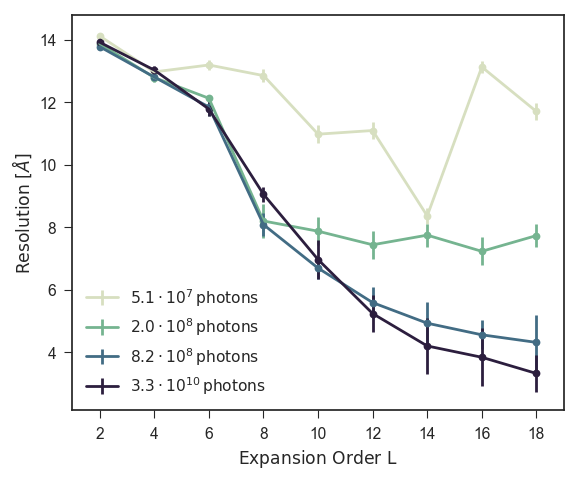

Dict{Any,Any} with 4 entries:
  "P20480000"   => [13.864,12.7829,12.1199,8.19299,7.8662,7.43143,7.74045,7.222…
  "P5120000"    => [14.1118,12.964,13.1855,12.846,10.9715,11.0885,8.35613,13.12…
  "P3276800000" => [13.9123,13.0224,11.775,9.04797,6.95883,5.23095,4.19378,3.83…
  "P81920000"   => [13.7694,12.8,11.8393,8.07695,6.68524,5.58111,4.92199,4.5507…

In [231]:
plot_crossing(kcut_vs_L, "paper/res_vs_L.pdf", dr(intensity_K38), K, triplet_counts, kcut_vs_L_range)

## Combining the two plots

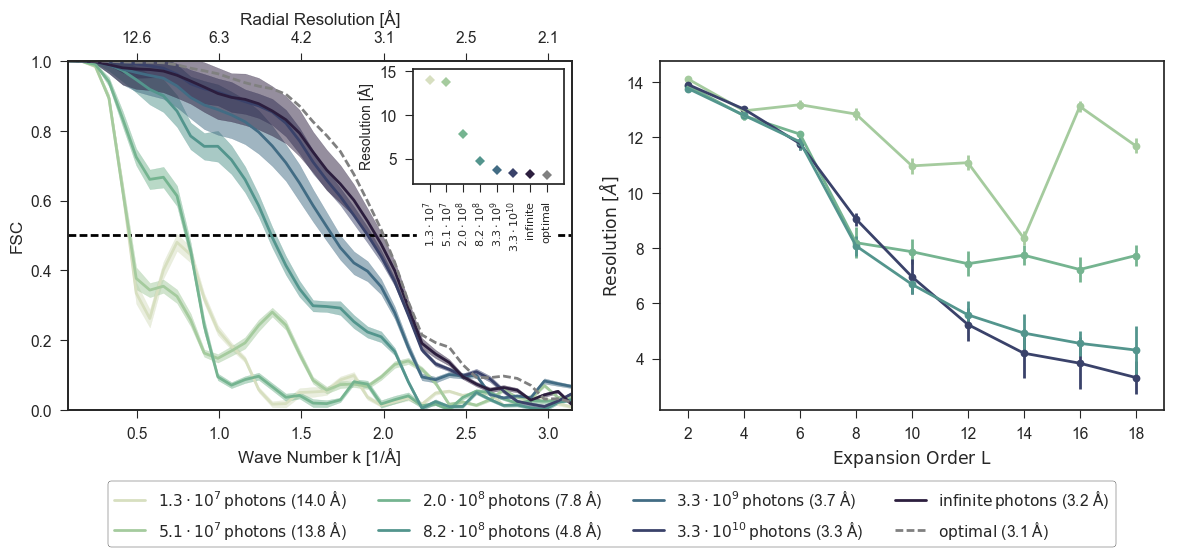

In [363]:
plot_fsc_and_crossing_in_one(sc_vs_triplets[K][L],"paper/sc_vs_triplets_K$(K)_L$(L)_N$(N)_and_res_vs_L.pdf", vcat(correlation_name_list, ["optimal"]), dr(intensity_K38), 38, kcut_vs_L, triplet_counts, kcut_vs_L_range, 10)

# Noise

In [127]:
sigmavals = [0.5, 0.75, 1.125, 2.5]
gammavals = collect(0.0:0.1:0.5)
noise_sc = Dict( sigma =>  Dict( gamma=> load_runs("$(data_dir)/output_owl/paper_noise_10p_KMAX38_N32_K26_L18_0.99998/G$(gamma)_S$(sigma)", densityCube_K38, fourierCube_K38, intensityCube_K38) for gamma in gammavals) for sigma in sigmavals)

Dict{Float64,Dict{Float64,Dict{String,Any}}} with 4 entries:
  0.5   => Dict(0.0=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.00155747,0.…
  1.125 => Dict(0.0=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.00155747,0.…
  2.5   => Dict(0.0=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.00155747,0.…
  0.75  => Dict(0.0=>Dict{String,Any}(Pair{String,Any}("isc_err",[0.00155747,0.…

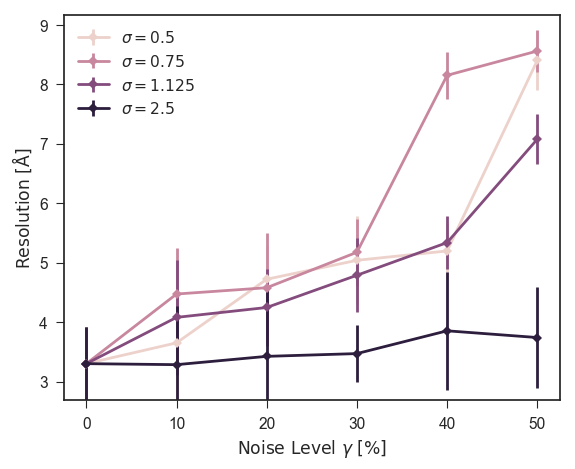

In [233]:
plot_noise_various_sigma(noise_sc,sigmavals, K, dr(intensity_K38), gammavals, "paper/noise_various_sigma.pdf")

# Denoising test

In [45]:
function check_radial_component_in_noise(gamma::Float64=0.1, number=1000)
    state = deserializeFromFile("../parallel/paper_noise_p10_KMAX38_N32_K26_L18_0.99998/G$(gamma)/$(number)/state.dat")
    params = deserializeFromFile("../parallel/paper_noise_p10_KMAX38_N32_K26_L18_0.99998/G$(gamma)/$(number)/params.dat")
    postprocess_run(params, state, true, 35, true)
end

check_radial_component_in_noise (generic function with 3 methods)

In [46]:
check_radial_component_in_noise()

Initializing SH structure from /Users/ben/Documents/biophysics/projects/reconstruction/code//structures/crambin.pdb with lmax=25, kmax=38, rmax=35.0.
Saving cube to unfitted_intensity.mrc with cubesize=77
Start with fitting
Best intensity correlation: 0.5037430205791096
Saving cube to intensity.mrc with cubesize=77
Initializing cubic structure from /Users/ben/Documents/biophysics/projects/reconstruction/code//structures/crambin.pdb with cubesize=77, rmax=35.0.
	From worker 8:	Correlation in realspace of fit: 0.5940770606921699
	From worker 8:	Resolution of fit: 6.208981449672923
	From worker 7:	Correlation in realspace of fit: 0.6482296986542587
	From worker 7:	Resolution of fit: 5.010717810714004
	From worker 6:	Correlation in realspace of fit: 0.6358090429407061
	From worker 6:	Resolution of fit: 5.205923909537186
	From worker 2:	Correlation in realspace of fit: 0.62769751385284
	From worker 2:	Resolution of fit: 5.141862741037841
	From worker 4:	Correlation in realspace of fit: 0.60

In [47]:
# check fitting structure

In [62]:
begin
    state = deserializeFromFile("$(data_dir)/output_owl/paper_noise_p10_KMAX38_N32_K26_L18_0.99998/G0.1/1000/state.dat")
    input_intensity = deleteTerms(state["intensity"],K,L)
    input_intensity = denoise_structure(input_intensity, intensity_K38, K)[1]
    fitted_intensity,a,b,c,d = fitStructures_alt(input_intensity, intensity_K38, K, L , 0.99)
    saveCube(fitted_intensity, "fitted_intensity.mrc")
end

Best intensity correlation: 0.7301942115079719
Saving cube to fitted_intensity.mrc with cubesize=77


In [55]:
fittedDensityCube,isc,fsc,isc_nofitting = calculateSC(fitted_intensity, densityCube_K38, fourierCube_K38, intensityCube_K38,nworkers())

	From worker 3:	Correlation in realspace of fit: 0.6013953568265483
	From worker 3:	Resolution of fit: 7.189243378770938
	From worker 9:	Correlation in realspace of fit: 0.543585489859009
	From worker 9:	Resolution of fit: 10.73083097874794
	From worker 5:	Correlation in realspace of fit: 0.6522018962397906
	From worker 5:	Resolution of fit: 5.34488582077496
	From worker 4:	Correlation in realspace of fit: 0.6647903524662842
	From worker 4:	Resolution of fit: 6.760792515907591
	From worker 8:	Correlation in realspace of fit: 0.5945795463126593
	From worker 8:	Resolution of fit: 6.882066611368478
	From worker 2:	Correlation in realspace of fit: 0.6681768843606273
	From worker 2:	Resolution of fit: 6.913114139353917
	From worker 6:	Correlation in realspace of fit: 0.6552065308160242
	From worker 6:	Resolution of fit: 6.965971515082009
	From worker 7:	Correlation in realspace of fit: 0.6138829913849545
	From worker 7:	Resolution of fit: 6.798489126568456
Best resolution: 4.881127436554501

(CubeVolume(Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]

Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]

Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]

...

Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]

Complex{Float64}[0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]

Complex{Float

In [56]:
saveCube(fittedDensityCube, "another_density.mrc")

Saving cube to another_density.mrc with cubesize=77


## Model quality

In [364]:
ISC_vs_L_K,ISC_vs_L_range,model_isc = calculate_ISC_vs_L(intensity_K38)

Processed 8
Processed 10
Processed 12
Processed 14
Processed 16
Processed 18
Processed 20


(35,8:2:20,Dict{Any,Any}(Pair{Any,Any}(20,Dict{Any,Any}(Pair{Any,Any}("std",[5.6368e-16,4.57757e-16,1.21956e-15,3.49127e-16,7.82974e-14,5.29189e-11,8.71982e-9,2.94177e-7,1.20891e-5,0.000135536  …  0.0101543,0.00772216,0.00406095,0.00751574,0.003516,0.00671584,0.00848578,0.00785365,0.00604478,0.00789285]),Pair{Any,Any}("mean",[1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999998,0.999938,0.999274  …  0.909877,0.924567,0.924053,0.908301,0.920224,0.928261,0.901987,0.914057,0.934014,0.935051]),Pair{Any,Any}("all",Any[[1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999998,0.999936,0.999336  …  0.902723,0.926542,0.9133,0.901859,0.921975,0.926546,0.901213,0.913564,0.935224,0.938075],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999998,0.999944,0.999347  …  0.901354,0.914194,0.923503,0.91614,0.922074,0.924158,0.896519,0.913047,0.932223,0.919296],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999998,0.999934,0.999113  …  0.916011,0.922375,0.923321,0.911791,0.924132,0.933898,0.901809,0.915478,0.938527,0.942729],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999997,0.999917,

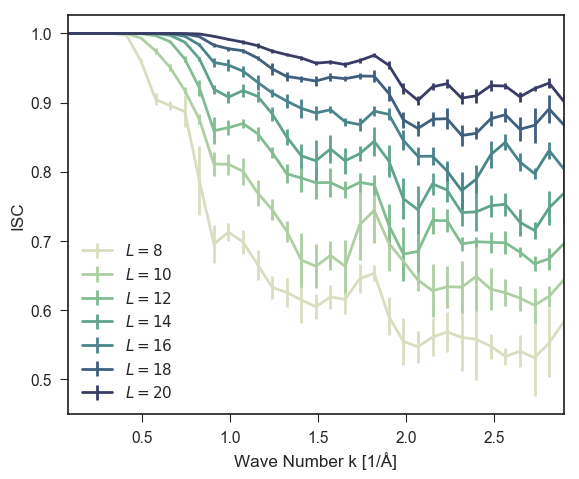

In [365]:

plot_ISC_vs_L(ISC_vs_L_K,ISC_vs_L_range,model_isc, dr(intensity_K38))

## Resolution of K,L,KMAX pairings

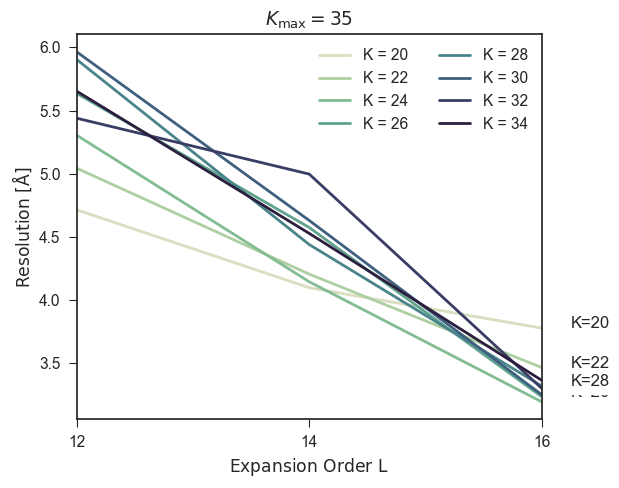

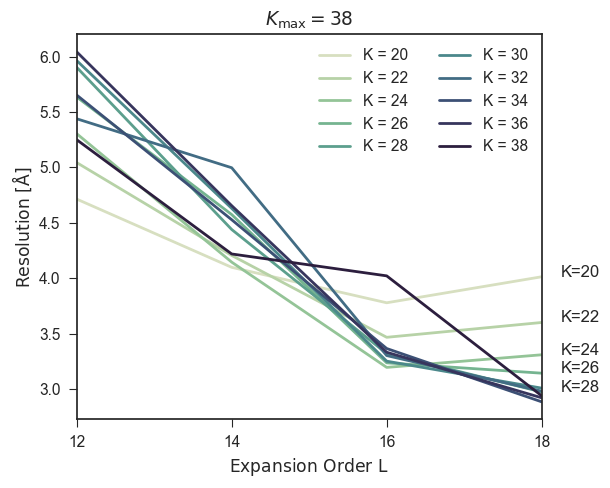

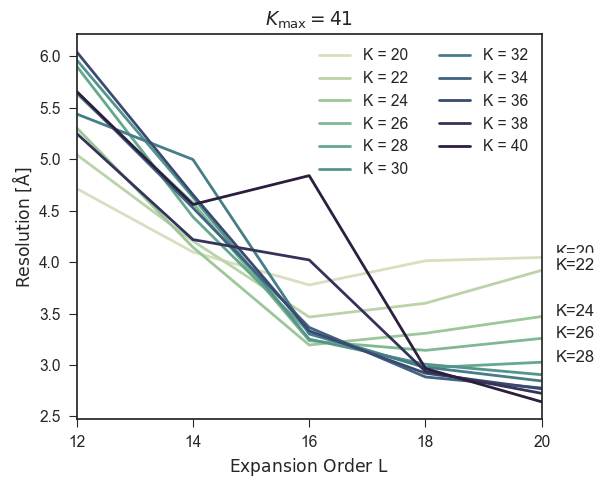

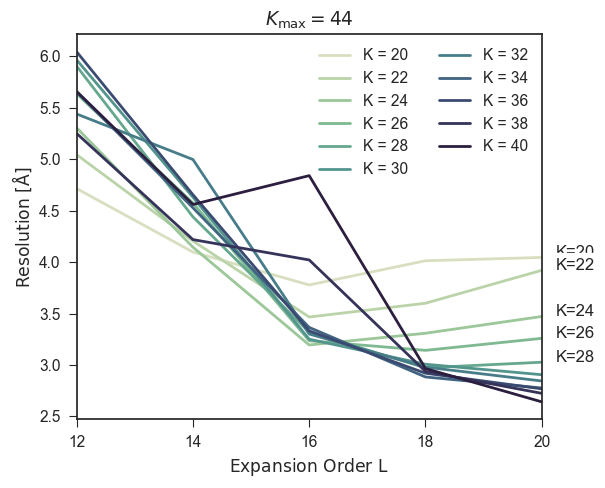

In [241]:
for KOPTIMAL = 35:3:44
    plot_optimal_parameter(parameter_list, KOPTIMAL)
end

## Model quality Part 2

If we keep the number of coefficients fixed for a KMAX and vary L and num_shells at the same time, which ratio is the best?

Note: This comparison has a problem, L is capped at KMAX (for our purpose) Otherwise higher L are almost always better.

bestL: 10, bestK: 15, Unknowns: 1000 - Bestratio: 1.5 (20.772736002225315)
bestL: 14, bestK: 12, Unknowns: 1500 - Bestratio: 0.8571428571428571 (23.82561658659304)
bestL: 14, bestK: 17, Unknowns: 2000 - Bestratio: 1.2142857142857142 (25.804776073105906)
bestL: 16, bestK: 16, Unknowns: 2500 - Bestratio: 1.0 (27.171813577963235)
bestL: 18, bestK: 16, Unknowns: 3000 - Bestratio: 0.8888888888888888 (28.764535163309265)
bestL: 20, bestK: 15, Unknowns: 3500 - Bestratio: 0.75 (29.31318808476896)
bestL: 20, bestK: 17, Unknowns: 4000 - Bestratio: 0.85 (29.99384314324213)
bestL: 22, bestK: 16, Unknowns: 4500 - Bestratio: 0.7272727272727273 (30.92442339294427)
bestL: 22, bestK: 18, Unknowns: 5000 - Bestratio: 0.8181818181818182 (31.309298356575567)
bestL: 24, bestK: 17, Unknowns: 5500 - Bestratio: 0.7083333333333334 (31.74633494934182)
bestL: 24, bestK: 18, Unknowns: 6000 - Bestratio: 0.75 (32.00618873778565)
bestL: 24, bestK: 20, Unknowns: 6500 - Bestratio: 0.8333333333333334 (32.32523994285376)

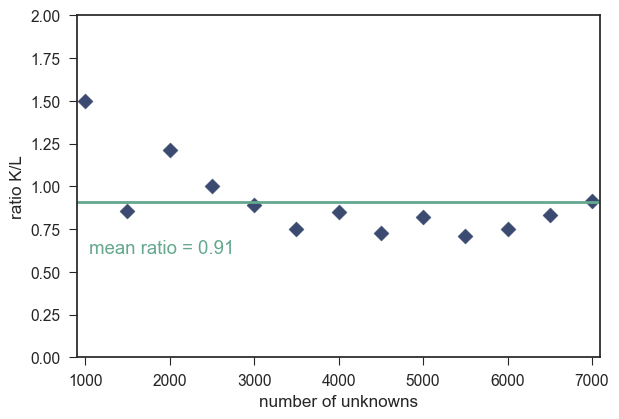

bestL: 24, bestK: 22, Unknowns: 7000 - Bestratio: 0.9166666666666666 (32.57869923307068)


In [267]:
calculate_optimal_parameter_ratio(intensityCube_K38)

In [36]:
begin 
    num_unknown = 2000
    for L = 6:2:20
        num_coefficients = 2*L^2-L
        K = round(Int32, num_unknown / num_coefficients)
        println("L=$L, K=$K, K/L=$(K/L)")
    end
end

L=6, K=30, K/L=5.0
L=8, K=17, K/L=2.125
L=10, K=11, K/L=1.1
L=12, K=7, K/L=0.5833333333333334
L=14, K=5, K/L=0.35714285714285715
L=16, K=4, K/L=0.25
L=18, K=3, K/L=0.16666666666666666
L=20, K=3, K/L=0.15


# Number of Unknowns

In [30]:
#Open formula for unknown coefficients
println([ (L,sum([2*l+1 for l = 0:2:L])) for L=0:2:18])
#Closed formula for unknown coefficients per shell
println([ (L,Integer(0.5L^2+1.5L+1)) for L=0:2:18])
#Closed formula for unknown coefficients per shell
L"\dfrac{1}{2}L^2+\dfrac{3}{2}L+1"

Tuple{Int64,Int64}[(0,1),(2,6),(4,15),(6,28),(8,45),(10,66),(12,91),(14,120),(16,153),(18,190)]
Tuple{Int64,Int64}[(0,1),(2,6),(4,15),(6,28),(8,45),(10,66),(12,91),(14,120),(16,153),(18,190)]


L"$\dfrac{1}{2}L^2+\dfrac{3}{2}L+1$"

In [235]:
L=18
K=26

26

In [236]:
(0.5*L^2+1.5L+1) * K

4940.0

In [218]:
# N-dimensional rotations have N(N-1)/2 free angles for dimension N (source : http://www.cs.indiana.edu/pub/hanson/Siggraph01QuatCourse/ggndrot.pdf)
println([ (l, Integer(sum([(2*L+1)*(2*L)/2 for L=2:2:l]))) for l=2:2:18])

#Closed formula for the number of rotation angles
println([Integer(1/3*(l^3+15/4*l^2+7/2*l)) for l=2:2:18])

L"\dfrac{1}{3}(L^3+\dfrac{15}{4}L^2+\dfrac{7}{2}L)"

Tuple{Int64,Int64}[(2,10),(4,46),(6,124),(8,260),(10,470),(12,770),(14,1176),(16,1704),(18,2370)]
[10,46,124,260,470,770,1176,1704,2370]


L"$\dfrac{1}{3}(L^3+\dfrac{15}{4}L^2+\dfrac{7}{2}L)$"

## Approximation of scattered photons

In [ ]:
creload("ThreePhotons")
include("paper.jl")

In [19]:
calculate_scattered_photons("$(data_dir)/structures/crambin.pdb")

Fluence (6.366197723675815e25), area (7.853981633974482e-15), beam photons (5.0e11)
Processing /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb
Coherent photons: 7.694692724736128e-5


In [15]:
calculate_scattered_photons_old_naive("$(data_dir)/structures/crambin.pdb")

Fluence (6.3661977236758135e7), area (7853.981633974483), beam photons (5.0e11)
Processing /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb
Coherent photons: 20.708031617549917
Incoherent photons: 4.458439251821883


In [4]:
calculate_scattered_photons("$(data_dir)/structures/crambin_water_shell_5A.pdb")

Fluence (6.3661977236758135e7), area (7853.981633974483), beam photons (5.0e11)
Processing /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb
Dict("C"=>211,"N"=>57,"O"=>67)
Coherent photons: 20.708031617549917
Incoherent photons: 4.458439251821883
Fluence (6.3661977236758135e7), area (7853.981633974483), beam photons (5.0e11)
Processing /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin_water_shell_5A.pdb
Dict("C"=>211,"N"=>57,"O"=>469)
Coherent photons: 62.679099970199815
Incoherent photons: 10.395809896830892


In [260]:
#10^12 at 7mu diameter focus
calculate_scattered_photons("$(data_dir)/structures/crambin.pdb", area=(100.0)^2*pi, beam_photons=1e12)

Fluence (3.1830988618379068e7), area (31415.926535897932), beam photons (1.0e12)
Processing ../structures/crambin.pdb
Coherent photons: 10.354015808774959
Incoherent photons: 2.2292196259109414


In [144]:
calculate_scattered_photons_water(100)

Fluence (6.3661977236758135e7), area (7853.981633974483), beam photons (5.0e11)
Coherent photons: 10.440564266828332
Incoherent photons: 1.4769578718927885


## Approximation of shape of water shell

In [ ]:
# _,_,intensityCube_with_water_K38 = createCubicStructure("../structures/crambin_water_shell_5A.pdb", 2*38+1, float(38))

averaged_intensity_with_water = CubeVolume(2*38+1, float(38))
averaged_intensity_with_water = @sync @parallel (+) for i = 1:100
    atomlist = loadPDB("$(data_dir)/output_owl/watershell/crambin_with_watershell_$(i).pdb")
    densCube = getDensityCube(atomlist, 2*38+1, float(38))
    fourierCube = forward(densCube)
    absoluteSquare(fourierCube)
end
saveCube(averaged_intensity_with_water, "output/averaged_water_shell_intensity.mrc")
println("done")

# Noise shapes

In [8]:
averaged_intensity_with_water = loadCube("output/averaged_water_shell_intensity.mrc")
println("done")

done


In [6]:
intensity_list = [
        Dict("intensity"=>intensityCube_K38, "label"=>"Reference", "color"=>reshape(colormodel(6)[3,:],3)),
        Dict("intensity"=>get_compton_noise_volume(intensityCube_K38), "label"=>"Compton", "color"=>"gray"),
        Dict("intensity"=>averaged_intensity_with_water, "label"=>"Reference with averaged water", "color"=>"skyblue"),
        [Dict("intensity"=>get_noise_volume(intensityCube_K38, sigma), "label"=>latexstring("\\sigma=$sigma"), "color"=>colormodelarray2(4)[i]) for (i,sigma) in enumerate([0.5, 0.75, 1.125, 2.5])];]

println("done")

done


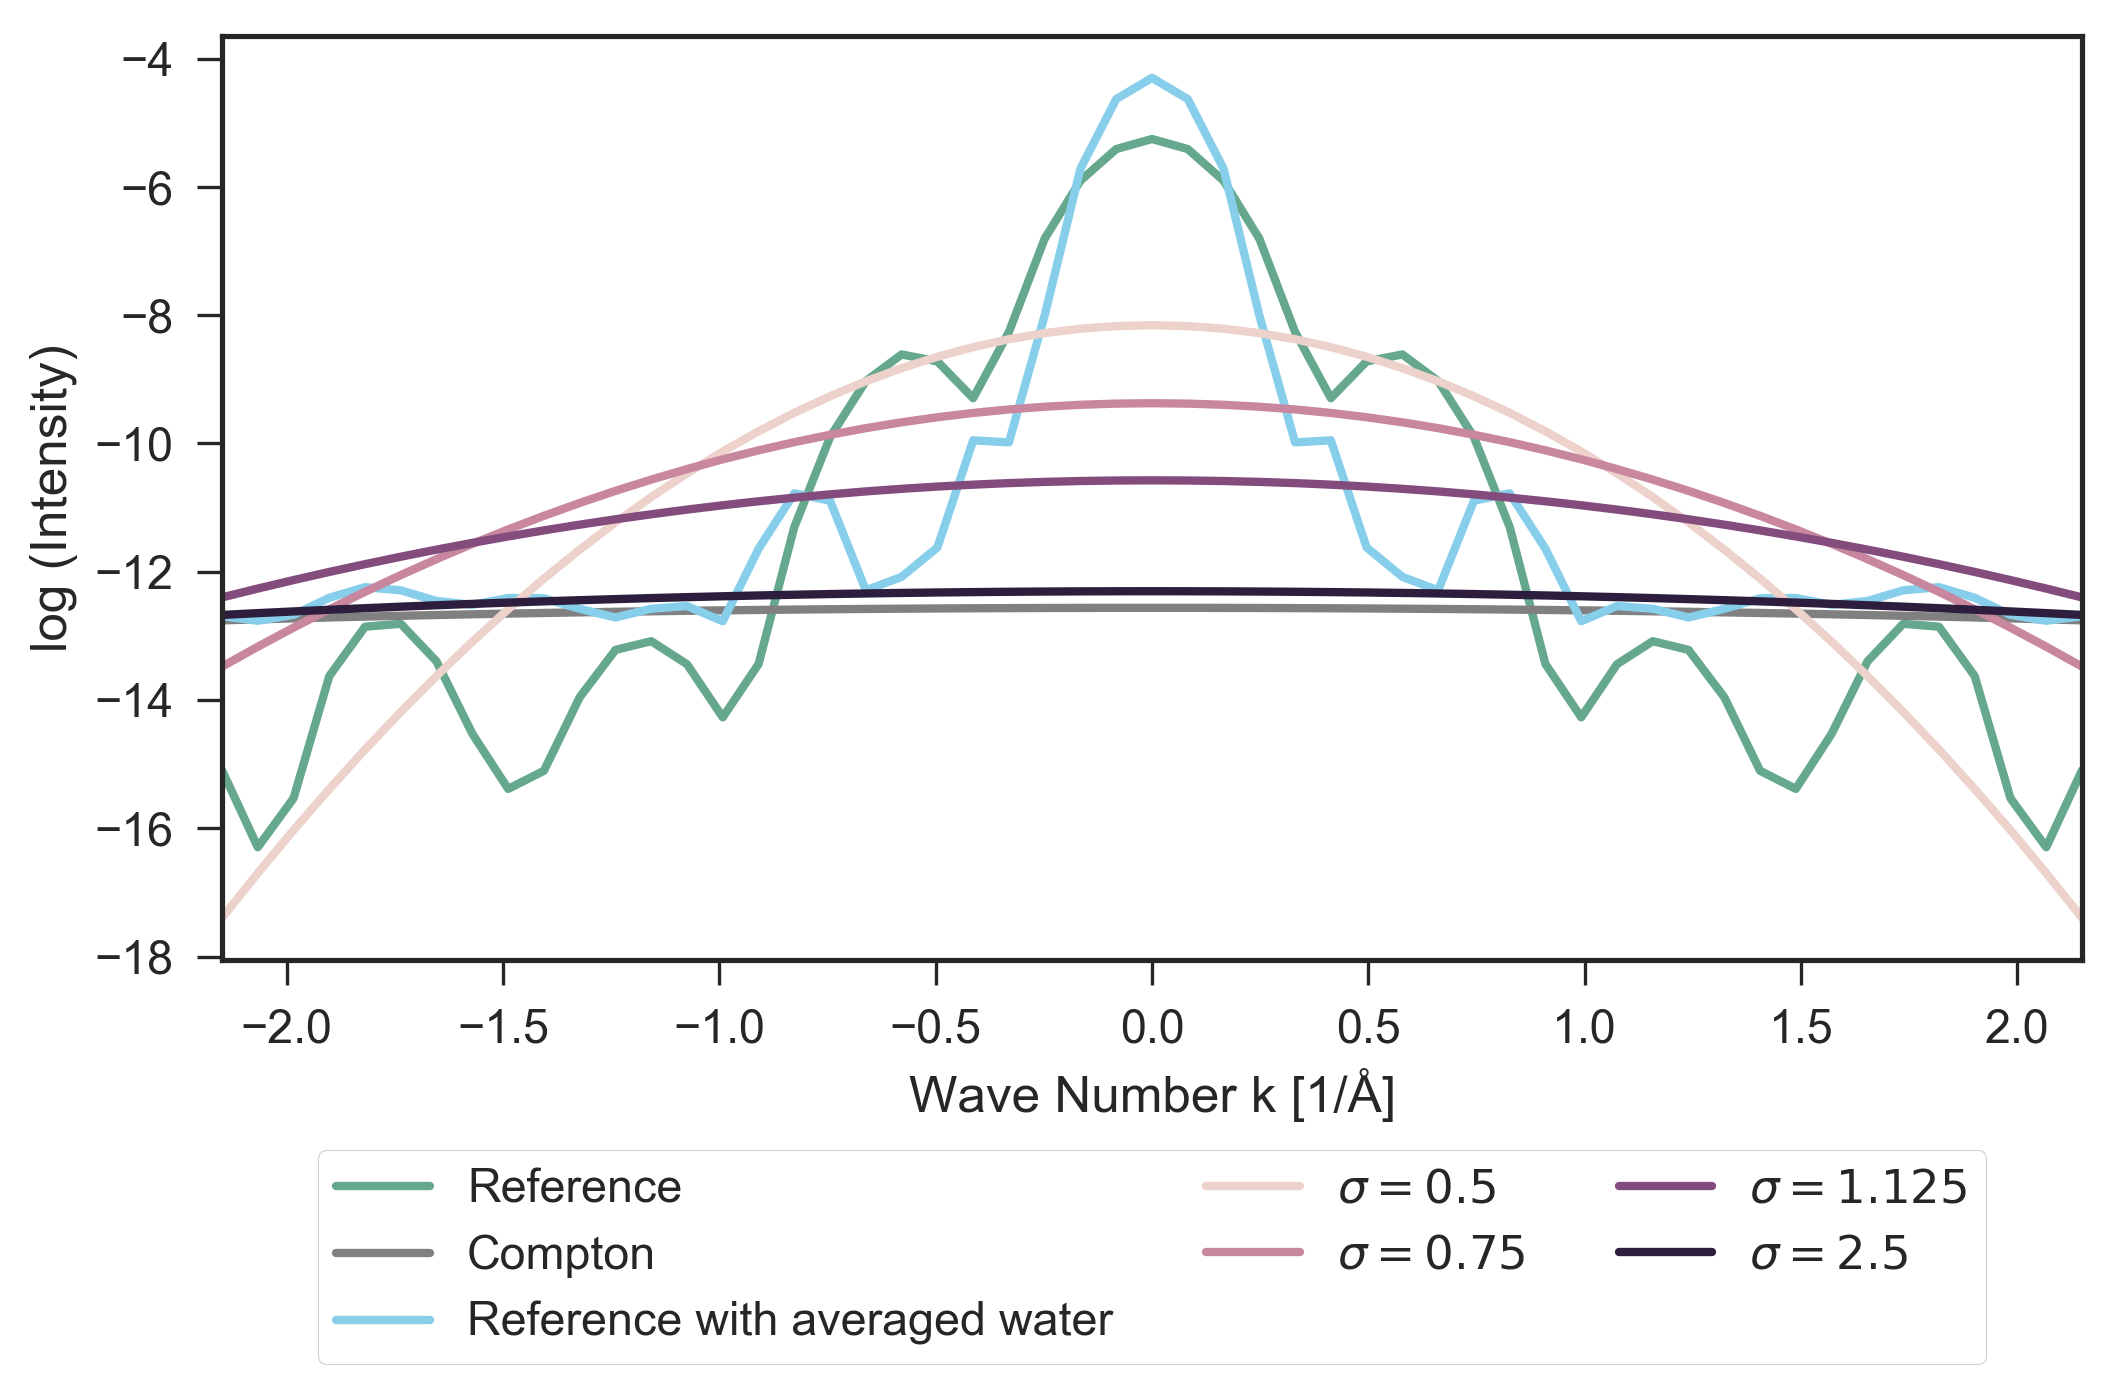

In [12]:
plot_compare_intensities_linear(intensity_list, "paper/intensity_compare_x_slice_with_noise.pdf")

# Number of triplets/photons as function of number of photons for various numbers of pictures

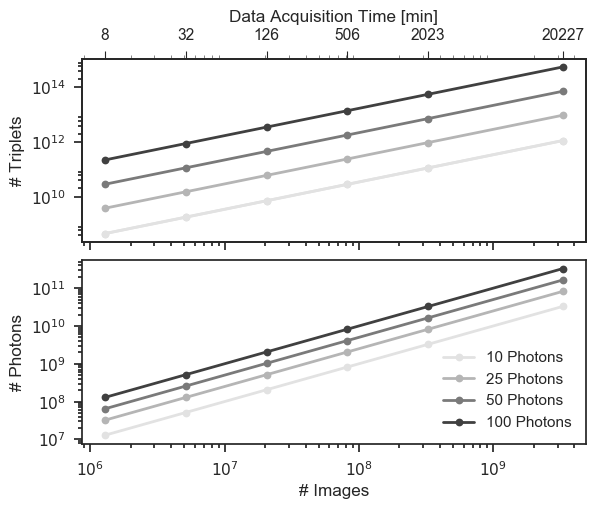

In [169]:
images_10p,triplets_10p = images_and_triplet_counts(correlation_name_list, triplet_counts)
plot_data_acquiration(images_10p,triplets_10p)

In [100]:
[minutues_to_measure(img, 27000, 0.1) for img in images]

6-element Array{Float64,1}:
     7.90123
    31.6049 
   126.42   
   505.679  
  2022.72   
 20227.2    

In [131]:
map((img)->ceil(Int64,calculate_required_images(calculate_expected_triplets(img, 10), 100)/8)*8, images)

6-element Array{Int64,1}:
    1648
    6568
   26248
  104968
  419864
 4198584

## Variation of Photons per Image

In [178]:
triplet_counts_ppi, correlation_name_list_ppi, sc_vs_triplets_ppi = load_linear_independant_triplets_data([10, 25, 50, 100], densityCube_K38, fourierCube_K38, intensityCube_K38)
println("Done")

Loading 10 photons.
Loaded 2.138293741999808e9 doublets and 7.488247893999958e9 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P20480000/histo.dat generated from 20480000 pictures.
Loaded 5.343778560000029e8 doublets and 1.870729304e9 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P5120000/histo.dat generated from 5120000 pictures.
Loaded 3.4213717671996933e10 doublets and 1.1980445971399933e11 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P327680000/histo.dat generated from 327680000 pictures.
Loaded 3.4212799220997107e11 doublets and 1.1979746196510442e12 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P3276800000/histo.dat generated from 3276800000 pictures.
Loaded 1.3368947400000073e8 doublets and 4.68111154e8 triplets from ../parallel/data_generation/SH_10p_N32_K38_R38.0_P1280000/histo.dat generated from 1280000 pictures.
Loaded 8.553134261999233e9 doublets and 2.9950117387999832e10 triplets from ../parallel/data_gene

In [71]:
calculate_images_ppi(10)*10

6-element Array{Int64,1}:
    12800000
    51200000
   204800000
   819200000
  3276800000
 32768000000

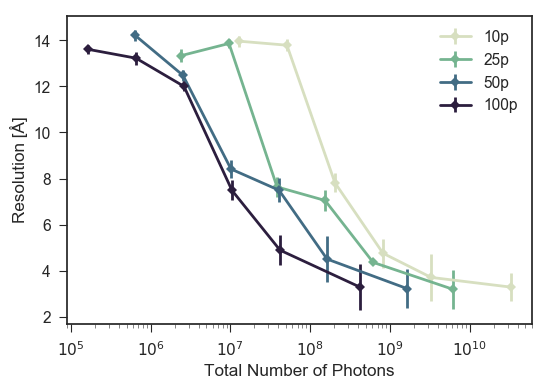

In [208]:
plot_linear_independant_triplets([10, 25, 50, 100], triplet_counts_ppi, correlation_name_list_ppi, sc_vs_triplets_ppi)

## Number of steps for convergence

In [218]:
ndim=37
minstepsize = 0.025
1/(2 - 2cos(minstepsize))*ndim*log(ndim)

213777.4744400646

In [263]:
test = (n) -> 1.0(0.99998)^n
test(100)

0.9980019787070289

In [267]:
test2 = (n) -> exp(-n/50000)
test2(100)

0.9980019986673331